In [145]:
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
import seaborn as sns

In [146]:
from sklearn import preprocessing
plt.rc("font",size=13)
sns.set(style="dark") #white background style for seaborn plots
sns.set(style="darkgrid", color_codes=True)
RED   = "\033[1;31m"  
BLUE  = "\033[1;34m"
CYAN  = "\033[1;36m"
GREEN = "\033[0;32m"

In [147]:
titanic_df = pd.read_csv('/Users/harshitagarwal/Desktop/Kaggle Competitions/Titanic - ML from Disaster/titanic/train.csv')
test_df = pd.read_csv('/Users/harshitagarwal/Desktop/Kaggle Competitions/Titanic - ML from Disaster/titanic/test.csv')
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [148]:
test_df.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [149]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [150]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [151]:
titanic_df[titanic_df['Age'].isnull()]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [152]:
print('The number of null values are - ', titanic_df['Age'].isnull().sum())

The number of null values are -  177


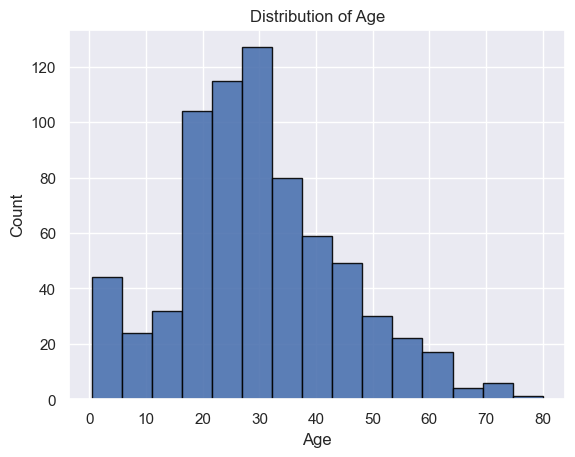

In [153]:
plt.hist(titanic_df['Age'], bins=15, edgecolor='black', alpha=0.9)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.style.use('ggplot')
plt.show()

In [154]:
m1 = titanic_df['Age'].median(skipna=True)
m2 = titanic_df['Age'].mean(skipna=True)
print('median is : ',m1)
print('mean is : ',m2)

median is :  28.0
mean is :  29.69911764705882


/var/folders/yn/q_cgy5m947g4bj3shsg12lpc0000gn/T/ipykernel_16762/1481084406.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Embarked', data=titanic_df, palette='Set1')


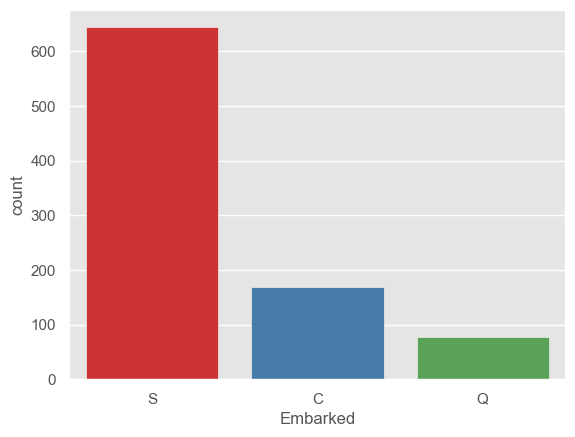

In [155]:
sns.countplot(x='Embarked', data=titanic_df, palette='Set1')
plt.show()

In [156]:
train_data = titanic_df
train_data['Age'].fillna(28, inplace=True)
train_data['Embarked'].fillna('S', inplace=True)
train_data.drop('Cabin',axis=1,inplace=True)

/var/folders/yn/q_cgy5m947g4bj3shsg12lpc0000gn/T/ipykernel_16762/3016031788.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Age'].fillna(28, inplace=True)
/var/folders/yn/q_cgy5m947g4bj3shsg12lpc0000gn/T/ipykernel_16762/3016031788.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

In [157]:
#Create categorical variable for travelling alone
train_data['TravelBuds'] = train_data['SibSp']+train_data['Parch']
train_data['TravelAlone'] = np.where(train_data['TravelBuds']>0,0,1)
train_data.drop('SibSp',inplace=True,axis=1)
train_data.drop('Parch',inplace=True,axis=1)
train_data.drop('TravelBuds',inplace=True,axis=1)

#Create categorical variable for Pclass and do ONE-HOT ENCODING
train2 = pd.get_dummies(train_data, columns=['Pclass'],dtype=int)
train3 = pd.get_dummies(train2, columns=['Embarked'],dtype=int)
train4 = pd.get_dummies(train3, columns=['Sex'],dtype=int)
train4.drop('Sex_female', axis=1, inplace=True)

#Drop Unwanted columns
train4.drop('PassengerId', axis=1, inplace=True)
train4.drop('Name', axis=1, inplace=True)
train4.drop('Ticket', axis=1, inplace=True)

train4.head(5)


,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,0,22.0,7.2500,0,0,0,1,0,0,1,1
1,1,38.0,71.2833,0,1,0,0,1,0,0,0
2,1,26.0,7.9250,1,0,0,1,0,0,1,0
3,1,35.0,53.1000,0,1,0,0,0,0,1,0
4,0,35.0,8.0500,1,0,0,1,0,0,1,1


In [158]:
df_final = train4

In [159]:
test_df["Age"].fillna(28, inplace=True)
test_df["Fare"].fillna(14.45, inplace=True)
test_df.drop('Cabin', axis=1, inplace=True)

/var/folders/yn/q_cgy5m947g4bj3shsg12lpc0000gn/T/ipykernel_16762/2981266083.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df["Age"].fillna(28, inplace=True)
/var/folders/yn/q_cgy5m947g4bj3shsg12lpc0000gn/T/ipykernel_16762/2981266083.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behave

In [160]:
test_df['TravelBuds']=test_df["SibSp"]+test_df["Parch"]
test_df['TravelAlone']=np.where(test_df['TravelBuds']>0, 0, 1)

test_df.drop('SibSp', axis=1, inplace=True)
test_df.drop('Parch', axis=1, inplace=True)
test_df.drop('TravelBuds', axis=1, inplace=True)

test2 = pd.get_dummies(test_df, columns=["Pclass"],dtype=int)
test3 = pd.get_dummies(test2, columns=["Embarked"], dtype=int)

test4=pd.get_dummies(test3, columns=["Sex"], dtype=int)
test4.drop('Sex_female', axis=1, inplace=True)

test4.drop('PassengerId', axis=1, inplace=True)
test4.drop('Name', axis=1, inplace=True)
test4.drop('Ticket', axis=1, inplace=True)
final_test = test4

In [161]:
final_test.head(5)

,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,34.5,7.8292,1,0,0,1,0,1,0,1
1,47.0,7.0000,0,0,0,1,0,0,1,0
2,62.0,9.6875,1,0,1,0,0,1,0,1
3,27.0,8.6625,1,0,0,1,0,0,1,1
4,22.0,12.2875,0,0,0,1,0,0,1,0


# EDA

# Exploration of Age

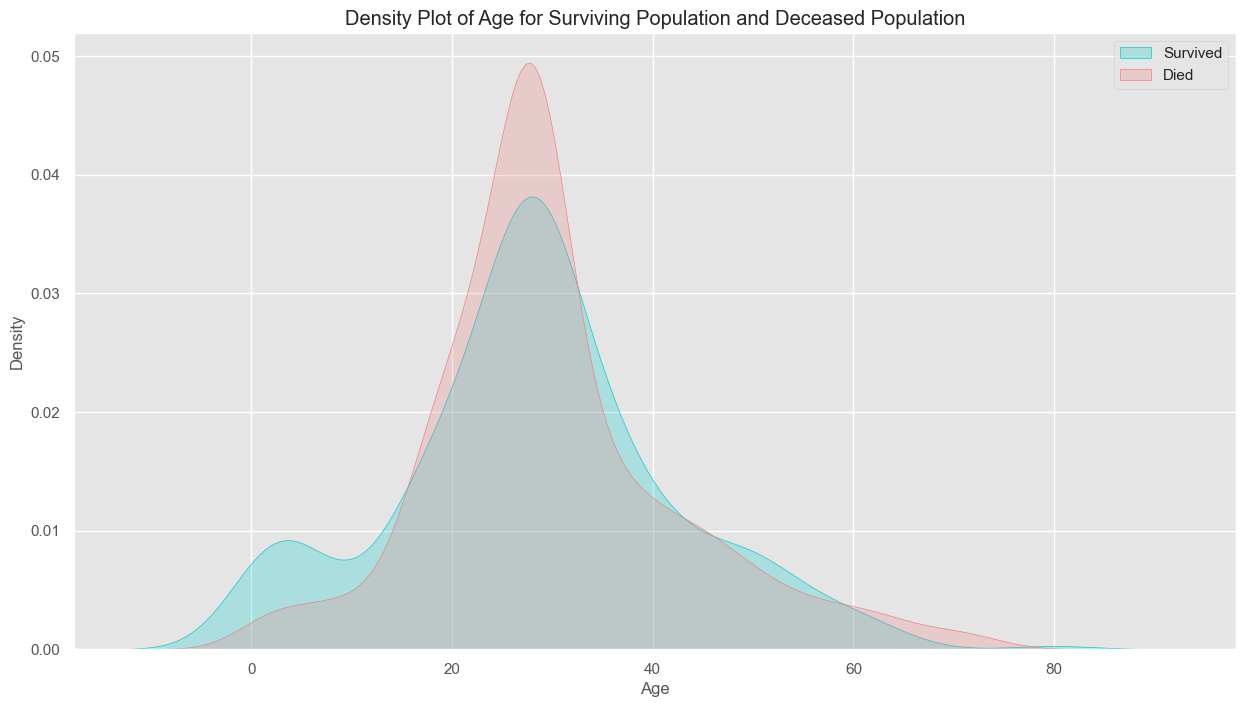

In [162]:
plt.figure(figsize=(15,8))
sns.kdeplot(titanic_df["Age"][df_final.Survived == 1], color="darkturquoise", fill=True)
sns.kdeplot(titanic_df["Age"][df_final.Survived == 0], color="lightcoral", fill=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Age for Surviving Population and Deceased Population')
plt.show()

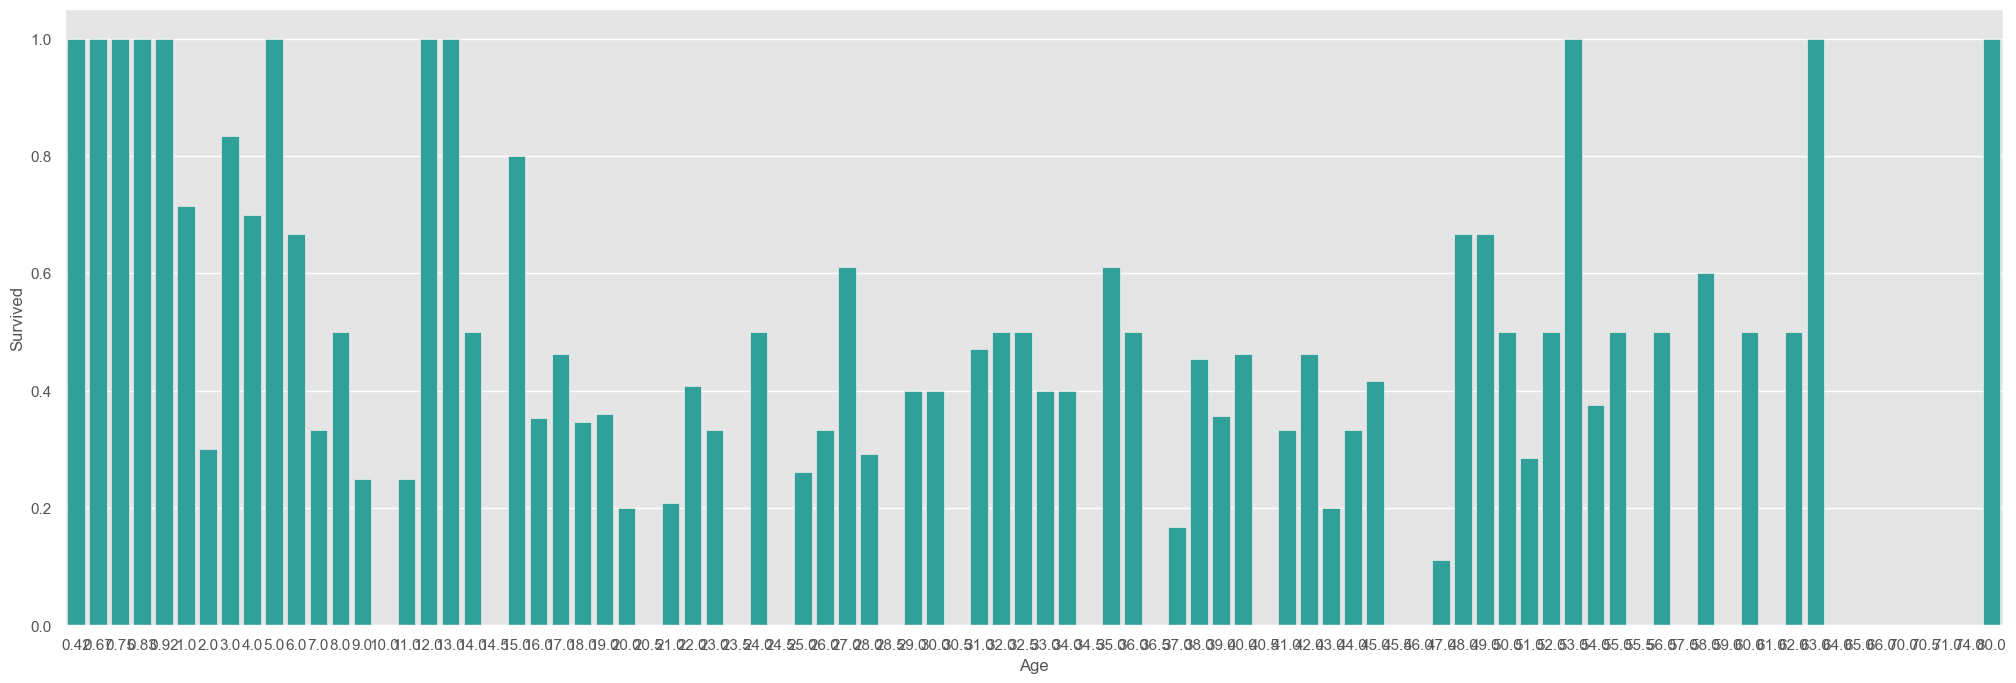

In [163]:
plt.figure(figsize=(25,8))
avg_survival_byage = df_final[["Age", "Survived"]].groupby(['Age'],as_index=False).mean()
g = sns.barplot(x='Age', y='Survived', data=avg_survival_byage, color="LightSeaGreen")

In [164]:
df_final['IsMinor']=np.where(train_data['Age']<=16, 1, 0)

In [165]:
final_test['IsMinor']=np.where(final_test['Age']<=16, 1, 0)

# Exploration of Fare

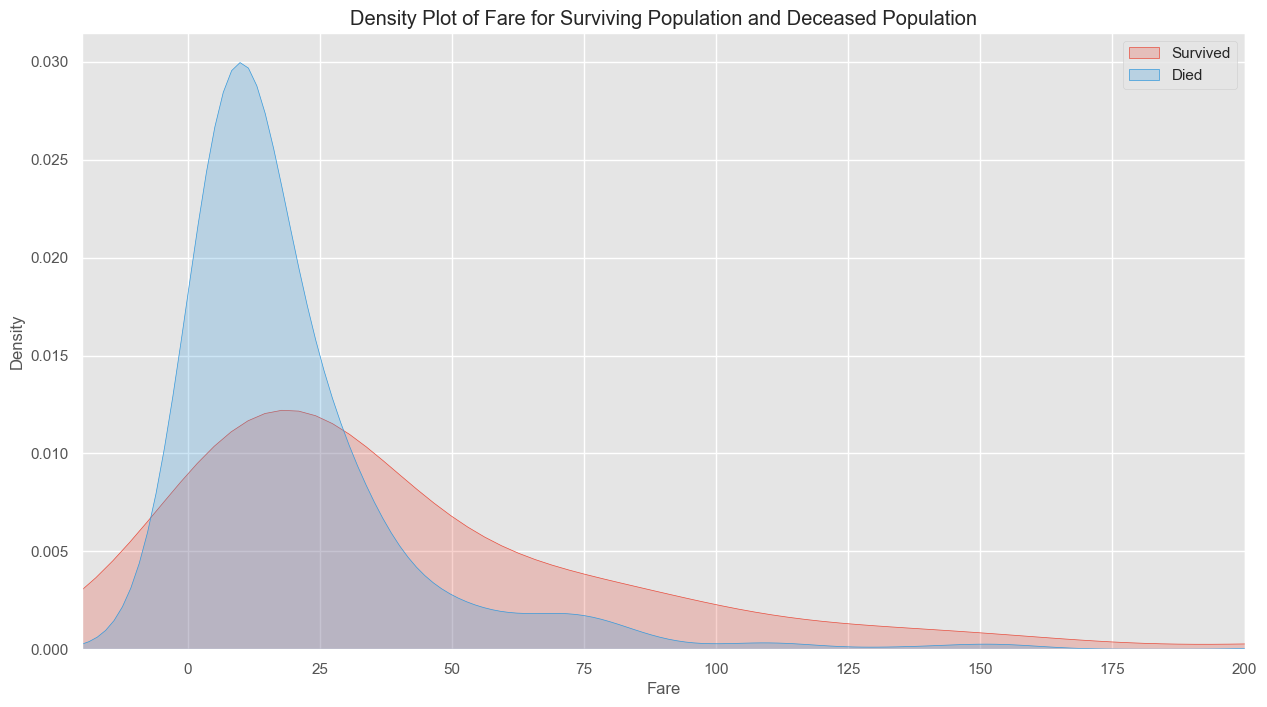

In [166]:
plt.figure(figsize=(15,8))
sns.kdeplot(df_final["Fare"][titanic_df.Survived == 1], color="#e74c3c", fill=True)
sns.kdeplot(df_final["Fare"][titanic_df.Survived == 0], color="#3498db", fill=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Fare for Surviving Population and Deceased Population')
# limit x axis to zoom on most information. there are a few outliers in fare. 
plt.xlim(-20,200)
plt.show()

# Exploration for Passenger Class

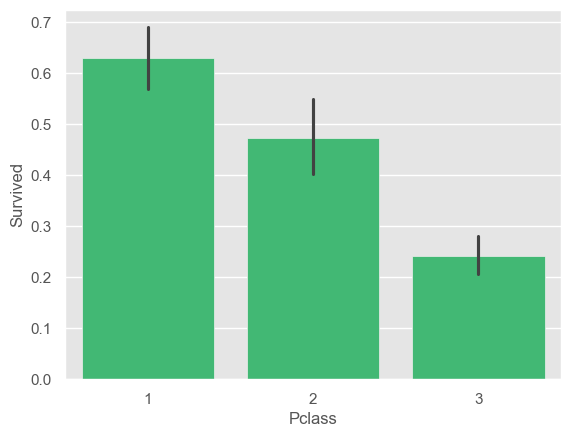

In [167]:
sns.barplot(x='Pclass', y='Survived', data=titanic_df, color="#2ecc71")
plt.show()

# Exploration of Embarked

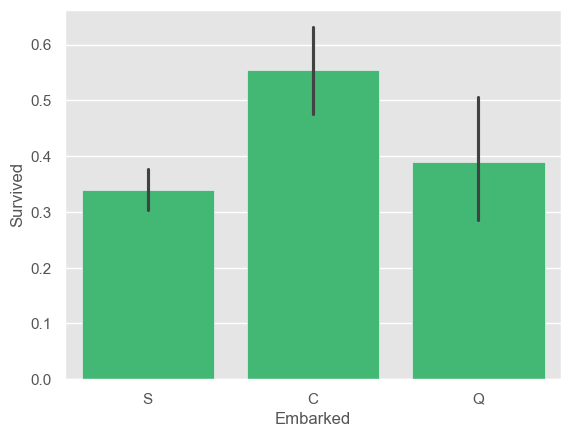

In [168]:
sns.barplot(x='Embarked',y='Survived', data=titanic_df, color="#2ecc71")
plt.show()

# Exploration of Travel Alone vs With Family

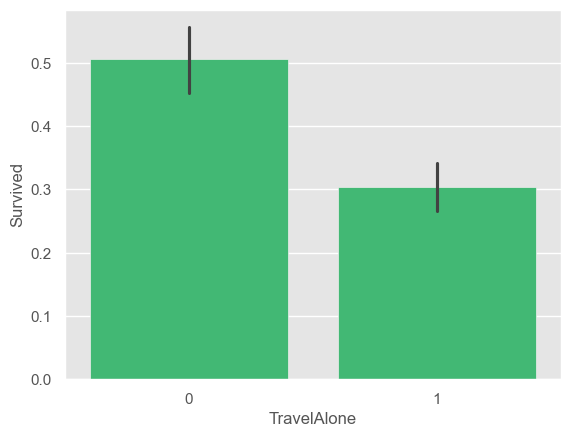

In [169]:
sns.barplot(x='TravelAlone', y='Survived', data=df_final, color="#2ecc71")
plt.show()


# Logistic Regression

In [170]:
cols=["Age", "Fare", "TravelAlone", "Pclass_1", "Pclass_2","Embarked_C","Embarked_S","Sex_male","IsMinor"] 
X=df_final[cols]
Y=df_final['Survived']

In [171]:
import statsmodels.api as sm
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
logit_model=sm.Logit(Y,X)
result=logit_model.fit()
sys.stdout.write(GREEN)
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.450348
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      882
Method:                           MLE   Df Model:                            8
Date:                Sun, 19 Oct 2025   Pseudo R-squ.:                  0.3237
Time:                        16:36:26   Log-Likelihood:                -401.26
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 4.627e-78
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Age            -0.0096      0.007     -1.372      0.170      -0.023       0.004
Fare            0.0018    

In [172]:
cols2=["Age", "Pclass_1", "Pclass_2","Embarked_C","Embarked_S","Sex_male"]  
X2=df_final[cols2]
Y=df_final['Survived']

logit_model=sm.Logit(Y,X2)
result=logit_model.fit()
sys.stdout.write(GREEN)
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.458585
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      885
Method:                           MLE   Df Model:                            5
Date:                Sun, 19 Oct 2025   Pseudo R-squ.:                  0.3113
Time:                        16:36:26   Log-Likelihood:                -408.60
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 1.131e-77
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Age           -0.0158      0.006     -2.602      0.009      -0.028      -0.004
Pclass_1       2.0449      0.

In [179]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X2, Y)

print("Model Accuracy : {:.2f}%".format(logreg.score(X2, Y)*100))

Model Accuracy : 79.12%


/Users/harshitagarwal/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/harshitagarwal/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/harshitagarwal/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/harshitagarwal/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/harshitagarwal/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/harshitagarwal/Library/Python/3.9/lib/python/site-packages/sklearn/u

In [174]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_final, test_size=0.25)

In [175]:
#re-fit logistic regression on new train sample

cols2=["Age", "Pclass_1", "Pclass_2","Embarked_C","Embarked_S","Sex_male"] 
X3=train[cols2]
Y3=train['Survived']
logit_model3=sm.Logit(Y3,X3)

In [180]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(X3, Y3)
sys.stdout.write(GREEN)
print("Model Accuracy : {:.2f}%".format(logreg.score(X3, Y3)*100))

Model Accuracy : 79.04%


/Users/harshitagarwal/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/harshitagarwal/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/harshitagarwal/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/harshitagarwal/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/harshitagarwal/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/harshitagarwal/Library/Python/3.9/lib/python/site-packages/sklearn/u

In [181]:
from sklearn import metrics
logreg.fit(X3, Y3)

X3_test = test[cols2]
Y3_test = test['Survived']

Y3test_pred = logreg.predict(X3_test)
sys.stdout.write(GREEN)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X3_test, Y3_test)*100))

Accuracy of logistic regression classifier on test set: 81.17


/Users/harshitagarwal/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/harshitagarwal/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/harshitagarwal/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/harshitagarwal/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/harshitagarwal/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/harshitagarwal/Library/Python/3.9/lib/python/site-packages/sklearn/u

In [182]:
# Model's in sample AUC

from sklearn.metrics import roc_auc_score
logreg.fit(X3, Y3)
Y3_pred = logreg.predict(X3)

y_true = Y3
y_scores = Y3_pred
sys.stdout.write(GREEN)
print("Model ROC_AUC : {:.2f}%".format(roc_auc_score(y_true, y_scores)))

Model ROC_AUC : 0.77%


/Users/harshitagarwal/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/harshitagarwal/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/harshitagarwal/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/harshitagarwal/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/harshitagarwal/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/harshitagarwal/Library/Python/3.9/lib/python/site-packages/sklearn/u

# Random Forest Estimation

In [183]:
from sklearn.ensemble import RandomForestClassifier

cols=["Age", "Fare", "TravelAlone", "Pclass_1", "Pclass_2","Embarked_C","Embarked_S","Sex_male","IsMinor"] 
X=df_final[cols]
Y=df_final['Survived']

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X, Y)
sys.stdout.write(GREEN)
print ('ROC AUC: %0.3f' % random_forest.score(X, Y) )

ROC AUC: 0.980


In [184]:
final_test_RF=final_test[cols]
Y_pred_RF = random_forest.predict(final_test_RF)

# Decision Tree

In [186]:
from sklearn import tree
import graphviz
tree1 = tree.DecisionTreeClassifier(criterion='gini', splitter='best',max_depth=3, min_samples_leaf=20)

In [187]:
cols=["Age", "Fare", "TravelAlone", "Pclass_1", "Pclass_2","Embarked_C","Embarked_S","Sex_male","IsMinor"] 
X_DT=df_final[cols]
Y_DT=df_final['Survived']

tree1.fit(X_DT, Y_DT)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=20)

In [188]:
import graphviz 
tree1_view = tree.export_graphviz(tree1, out_file=None, feature_names = X_DT.columns.values, rotate=True) 
tree1viz = graphviz.Source(tree1_view)
tree1viz

ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [189]:
final_test_DT=final_test[cols]
Y_pred_DT = tree1.predict(final_test_DT)

submission = pd.DataFrame({
       "PassengerId": test_df["PassengerId"],
       "Survived": Y_pred_DT
   })
submission.to_csv('submission_DT.csv', index=False)

# Ensemble

In [190]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred_RF* 0.8 + Y_pred_DT*0.2 #ensmeble of two models
    })
submission.to_csv('submission_ensemble.csv', index=False)